# Fast Fourier Transform

Based on: https://plot.ly/matplotlib/fft/

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
%matplotlib inline

In [3]:
repos_path = "/Users/Clayton/temporal-features-for-buildings/"

In [6]:
meta = pd.read_csv(os.path.join(repos_path,"data/raw/meta_open.csv"), index_col='uid', parse_dates=["datastart","dataend"], dayfirst=True)

In [7]:
temp = pd.read_csv((os.path.join(repos_path,"data/interim/temp_open_utc_complete.csv")), index_col='timestamp', parse_dates=True).tz_localize('utc')

# Reset the axis to an index number -- we don't need datetime

In [8]:
df_reset_axis = pd.DataFrame()
for building in temp.columns:
    sample = temp[building].dropna().reset_index(drop=True)
    df_reset_axis[building] = sample

In [10]:
df_reset_axis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 507 entries, Office_Cristina to PrimClass_Jenna
dtypes: float64(507)
memory usage: 33.9 MB


In [76]:
meta.index[2]

'Office_Elizabeth'

In [77]:
building = "Office_Elizabeth"

In [78]:
y = df_reset_axis[building]
n = len(y)

In [79]:
Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n/2)]

In [80]:
freqdomain = pd.DataFrame({building:Y})

In [81]:
sns.set(rc={"figure.figsize": (12,4)})
sns.set_style('whitegrid')

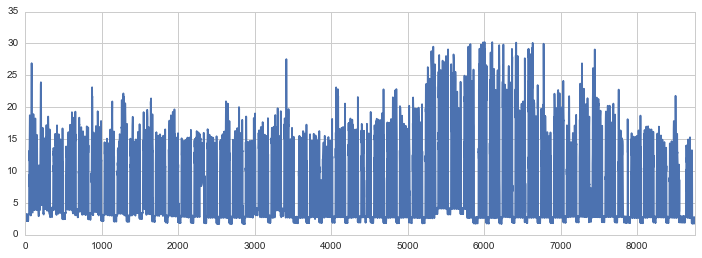

In [82]:
y.plot()

In [83]:
freqdomain = freqdomain.astype('float')

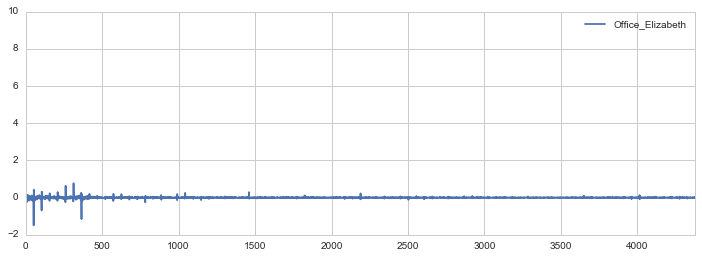

In [84]:
freqdomain.plot()

In [85]:
freqdomain_abs = np.abs(freqdomain)
freqdomain_abs.sort_values(building, ascending=False)

,Office_Elizabeth
0,9.075112
52,1.488958
365,1.154856
313,0.770549
104,0.687436
261,0.628908
2,0.444173
364,0.439488
53,0.420710
1,0.328461
